# Report Overview

1.  [Packages](#Packages)
2.  [Methods](#Methods)
3.  [General](#General)
4.  [Task performance](#Task-performance)
    * [Math](#Math)
    * [Stroop](#Stroop)
    * [CPT](#CPT)
5.  [Eye tracking](#Eye-tracking)


## Packages
**VRAM specific**

A majority of the code used for this analysis is located in */src/Vrama* directory. Several functions included here will eventially be refactored and integrated into the source code directory.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
sns.set(style="darkgrid")
import sys
sys.path.append('../../src/Vrama')
sys.path.append('../../src')

from Vrama import DataController
from Vrama import Tables
from Vrama import Eye

import time
from scipy import stats

### Methods

PlotRT(yL,sdL,bars,color,title)

PlotAcc(count,num_correct,num_response,bars,title)

PlotTask(df,task)

GetSubjectData(subjectID)

PlotDistractionOnOff(df_on,df_off,task)


In [11]:
def PlotRT(yL,sdL,bars,color,title):
    y_pos = np.arange(len(yL))
    fig, ax = plt.subplots()
    bar = plt.bar(y_pos, yL, yerr=sdL,color = color,ecolor = color,edgecolor = color )
    plt.xticks(y_pos, bars)
    plt.ylabel('reaction time')
    plt.title(title)
    plt.show()

def PlotAcc(count,num_correct,num_response,bars,title):
    crtL = num_correct/count
    incrtL = (num_response - num_correct)/count
    noL = (count - num_response)/count

    y_pos = np.arange(len(bars))
    fig, ax = plt.subplots()

    # The x position of bars
    barWidth = 0.3
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    plt.bar(r1, crtL,width = barWidth,label = 'correct')
    plt.bar(r2, incrtL,width = barWidth, label = 'incorrect')
    plt.bar(r3, noL,width = barWidth, label = 'no responses')
    plt.xticks(r2,labels = bars)

     # legend outside
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    
    plt.title(title)
    plt.ylabel('%')
    plt.show()
    
def PlotTask(df,task):
    mL = df['mean_rt']
    sdL = df['sd_rt']
    bars = [task + ' block 1',task + ' block 2',task + ' block 3']
    color = 'steelblue'
    title = task + ' Reaction time'
    PlotRT(mL,sdL,bars,color,title)

    count = df['count']
    num_correct = df['num_correct']
    num_response = df['num_responses']
    title = task + ' accuracy'
    PlotAcc(count,num_correct,num_response,bars,title)

def PlotTask_2blocks(df,task):
    mL = df['mean_rt']
    sdL = df['sd_rt']
    bars = [task + ' block 1',task + ' block 2']
    color = 'steelblue'
    title = task + ' Reaction time'
    PlotRT(mL,sdL,bars,color,title)

    count = df['count']
    num_correct = df['num_correct']
    num_response = df['num_responses']
    title = task + ' accuracy'
    PlotAcc(count,num_correct,num_response,bars,title)
    
def GetSubjectData(subjectID):
    dfAll = Eye.LoadEyeData(subjectID)
    dfList = Eye.GetDfList(dfAll)
    df_scores_all = pd.DataFrame()
    df_scores_on = pd.DataFrame()
    df_scores_off = pd.DataFrame()

    for i in dfList:
        df = Eye.PreProcessDf(i)
        dfOn = Eye.GetDistractorOn(df)
        dfOff = Eye.GetDistractorOff(df)
        df_scores_all = df_scores_all.append(Eye.GetScores(df,df))
        df_scores_on = df_scores_on.append(Eye.GetScores(dfOn,df))
        df_scores_off = df_scores_off.append(Eye.GetScores(dfOff,df))

        data_dict = {   'subjectID': subjectID,
                    'dfAll': dfAll,
                    'df_scores_all':df_scores_all,
                    'df_scores_on':df_scores_on,
                    'df_scores_off':df_scores_off           
                        }
    return data_dict

def PlotDistractionOnOff(df_on,df_off,task):
    count = df_on['count']
    num_correct = df_on['num_correct']
    crt_onL = num_correct/count

    count = df_off['count']
    num_correct = df_off['num_correct']
    crt_offL = num_correct/count

    # 
    bars = ['block 1','block 2','block 3']
    
    y_pos = np.arange(len(bars))
    fig, ax = plt.subplots()


    # the x position of bars
    barWidth = 0.3
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]

   

    # plot
    plt.bar(r1, crt_offL,width = barWidth,label = 'Off',color = "skyblue")
    plt.bar(r2, crt_onL,width = barWidth, label = 'On', color = "lightsalmon")
    plt.xticks(r2,labels = bars)
    
    # legend outside
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    
    plt.title(task + ": Distraction On vs Off by Block")
    plt.ylabel('%')
    plt.show()
    
def PlotDistractionOnOff_2blocks(df_on,df_off,task):
    count = df_on['count']
    num_correct = df_on['num_correct']
    crt_onL = num_correct/count

    count = df_off['count']
    num_correct = df_off['num_correct']
    crt_offL = num_correct/count

    # 
    bars = ['block 1','block 2']
    
    y_pos = np.arange(len(bars))
    fig, ax = plt.subplots()


    # the x position of bars
    barWidth = 0.3
    r1 = np.arange(len(bars))
    r2 = [x + barWidth for x in r1]

   

    # plot
    plt.bar(r1, crt_offL,width = barWidth,label = 'Off',color = "skyblue")
    plt.bar(r2, crt_onL,width = barWidth, label = 'On', color = "lightsalmon")
    plt.xticks(r2,labels = bars)
    
    # legend outside
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    
    plt.title(task + ": Distraction On vs Off by Block")
    plt.ylabel('%')
    plt.show()

## General

Screening session for subject 19205 occurred on May 24th. Nine blocks (three blocks of each task) were collected, which is maximum amount of task blocks we have been collecting. What is not made clear is the task block order. Each subject completes one block of each task. The task order is then repeated for the remaining six blocks.

In [3]:
subject = '19202'
Tables.GetSubjectSessionCount(subject)

,subject,date,SessionType,math,axcpt,stroop
0,19202,03_28_2019,Screening,2,3,3


In [4]:
# cpt
fpath = '../../data/processed/vive/vive_cpt_count_table.csv'
df_all = pd.read_csv(fpath)
df_cpt = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_cpt_count_distraction_on_table.csv'
df_all = pd.read_csv(fpath)
df_cpt_on = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_cpt_count_distraction_off_table.csv'
df_all = pd.read_csv(fpath)
df_cpt_off = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

# math
fpath = '../../data/processed/vive/vive_math_count_table.csv'
df_all = pd.read_csv(fpath)
df_math = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_math_count_distraction_on_table.csv'
df_all = pd.read_csv(fpath)
df_math_on = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_math_count_distraction_off_table.csv'
df_all = pd.read_csv(fpath)
df_math_off = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

# stroop
fpath = '../../data/processed/vive/vive_stroop_count_table.csv'
df_all = pd.read_csv(fpath)
df_stroop = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_stroop_count_distraction_on_table.csv'
df_all = pd.read_csv(fpath)
df_stroop_on = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

fpath = '../../data/processed/vive/vive_stroop_count_distraction_off_table.csv'
df_all = pd.read_csv(fpath)
df_stroop_off = df_all[df_all['Subject'] == int(subject)].reset_index(drop=True)

## Task performance

For each task type, we show the following:

* Results table
* Reaction time by block
* Performance by block (correct, incorrect, no response)
* Peformance by block (Distraction Off vx Distraction On)

### Math

In [5]:
df_math

,Subject,Date,SessionType,count,time_s,cnt_button1,cnt_button3,num_responses,num_correct,mean_rt,mean_crt_rt,sd_rt,sd_crt_rt
0,19202,03_28_2019_11_14_34,Screening,22,237.8123,12,7,22,13,9.173059,8.785851,5.974453,5.720177
1,19202,03_28_2019_11_41_33,Screening,24,234.2634,6,14,24,14,8.246735,7.550485,4.882785,3.690108


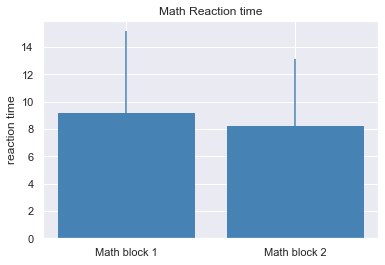

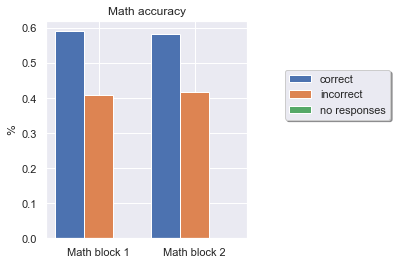

In [9]:
PlotTask_2blocks(df_math,'Math')

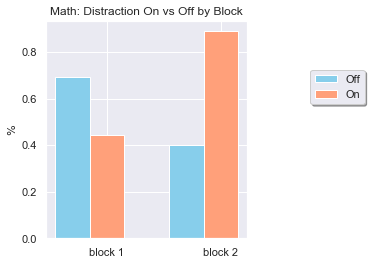

In [12]:
PlotDistractionOnOff_2blocks(df_math_on,df_math_off,"Math")

### Stroop

In [13]:
df_stroop

,Subject,Date,SessionType,count,time_s,cnt_button1,cnt_button3,num_responses,num_correct,mean_rt,mean_crt_rt,sd_rt,sd_crt_rt
0,19202,03_28_2019_11_02_15,Screening,81,236.3661,65,2,67,36,1.381137,1.256081,0.426174,0.360568
1,19202,03_28_2019_11_20_00,Screening,87,236.0914,13,3,27,15,1.284930,1.235482,0.362080,0.376876
2,19202,03_28_2019_11_47_00,Screening,82,236.0493,5,14,31,12,1.388814,1.288839,0.407505,0.280601


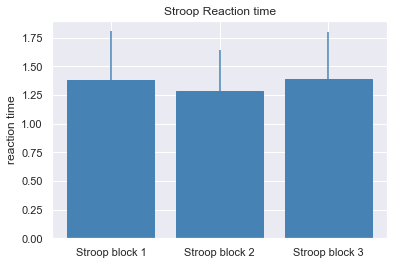

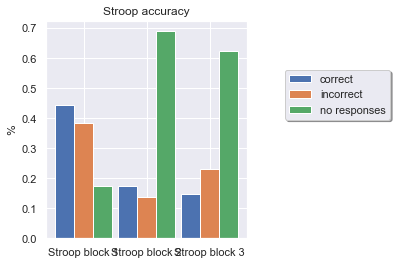

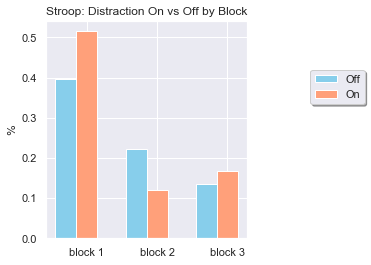

In [14]:
PlotTask(df_stroop,"Stroop")
PlotDistractionOnOff(df_stroop_on,df_stroop_off,"Stroop")

#### CPT

In [15]:
df_cpt

,Subject,Date,SessionType,count,time_s,cnt_button1,cnt_button3,num_responses,num_correct,mean_rt,mean_crt_rt,sd_rt,sd_crt_rt
0,19202,03_28_2019_11_08_48,Screening,105,232.5844,35,1,36,31,0.573651,0.573536,0.152881,0.158857
1,19202,03_28_2019_11_36_20,Screening,100,232.5979,1,5,16,4,0.566940,0.405334,0.193141,0.104319
2,19202,03_28_2019_11_55_21,Screening,104,232.5652,3,6,16,7,0.496140,0.472447,0.100450,0.048509


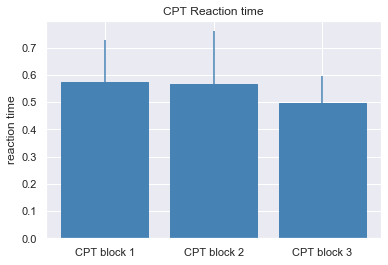

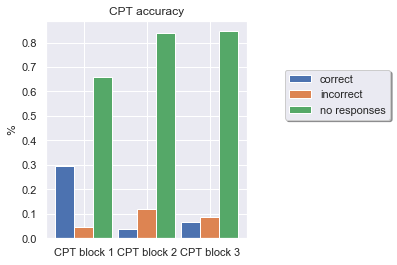

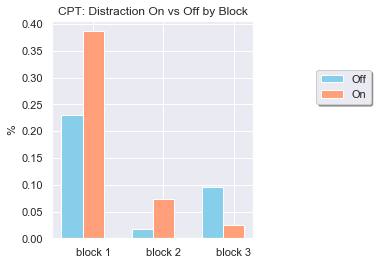

In [16]:
PlotTask(df_cpt,"CPT")
PlotDistractionOnOff(df_cpt_on,df_cpt_off,"CPT")

## Eye tracking

In [18]:
df = Eye.LoadEyeData(subject)
df = pd.read_csv(fpath)
df = Eye.PreProcessDf(df)
dfOn = Eye.GetDistractorOn(df)
dfOff = Eye.GetDistractorOff(df)
df_hold = pd.DataFrame()
df_hold['object'] = df['Active Gaze Object Name']
df_hold['deltaTime'] = df['deltaTime']
df_object_duration = df_hold.groupby('object').sum().reset_index()
df_object_type_duration = Eye.GetObjectDurDf2(df_object_duration,df)
dfByType_p = df_object_type_duration.groupby('Type').sum().apply(lambda x:100 * x / float(x.sum())).reset_index()
dfByType_s = df_object_type_duration.groupby('Type').sum().reset_index()

/Users/jaredstokes/anaconda3/envs/vram/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


#### Overall view duration table

**Table variables**
* Task duration
* % time gaze on distractor objects
* % time gaze on other environment objects
* % time gaze on whiteboard
* Time (ms) gaze on distractor objects
* Time (ms) gaze on other environment objects
* Time (ms) gaze on whiteboard
* List of all gaze objects
* List of all distractor objects




In [19]:
df_scores_all = Eye.GetScores(df,df).drop(columns='Task_name')
df_scores_on = Eye.GetScores(dfOn,df).drop(columns='Task_name')
df_scores_off = Eye.GetScores(dfOff,df).drop(columns='Task_name')

distractorsL = df_scores_all['Distractor_list']
objectsL = df_scores_all['Object_list']
df_scores_all

,Task_duration(min),View_duration_distractor(%),View_duration_other(%),View_duration_whiteboard(%),View_duration_distractor(ms),View_duration_other(ms),View_duration_whiteboard(ms),Object_list,Distractor_list
0,36.343655,1.709915,24.356625,73.93346,37286.7346,531125.2677,1.612207e+06,"[Null, FrontWall, GroundExterior, Kevin, White...","[nan, iPhoneX, Pedestrian, BusSouth, Child009,..."


In [20]:
df_scores_all.iloc[0,[1,2,3]].values

array([1.7099149188986884, 24.356625185523068, 73.93345989557824],
      dtype=object)

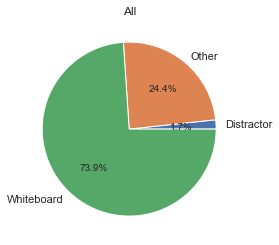

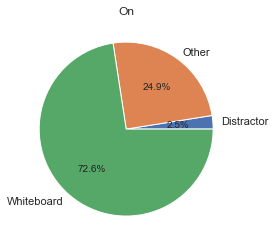

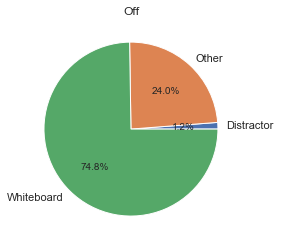

In [21]:
dur = df_scores_all.iloc[0,[1,2,3]].values
lab = ['Distractor','Other','Whiteboard']
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('All')
plt.show()

dur = df_scores_on.iloc[0,[1,2,3]].values
lab = ['Distractor','Other','Whiteboard']
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('On')
plt.show()

dur = df_scores_off.iloc[0,[1,2,3]].values
lab = ['Distractor','Other','Whiteboard']
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('Off')
plt.show()

In [22]:
pd.DataFrame({'distractors':distractorsL[0]}).drop([0])

,distractors
1,iPhoneX
2,Pedestrian
3,BusSouth
4,Child009
5,Child002
6,Child006
7,Child001
8,BusNorth
9,iPhoneX2
10,NewestTeacher


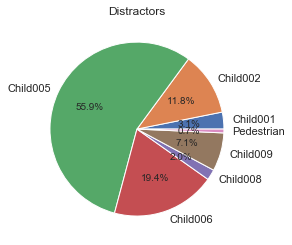

In [23]:
df_hold = df_object_type_duration[df_object_type_duration.Type == 'distractor']
dur = df_hold.Duration
lab = df_hold.Name
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('Distractors')
plt.show()

In [36]:
pd.DataFrame({'classroom objects':objectsL[0]}).drop([0])

,classroom objects
1,FrontWall
2,GroundExterior
3,Kevin
4,WhiteBoardWithDisplay
5,UCDavisTeacher
6,Whiteboard1
7,CeilingCollider
8,Quinn
9,printer
10,cabinet002


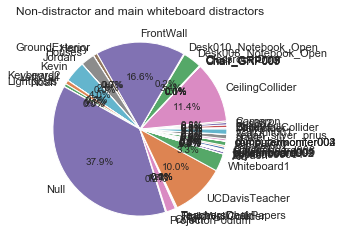

In [24]:
df_hold = df_object_type_duration[df_object_type_duration.Type == 'other']
dur = df_hold.Duration
lab = df_hold.Name
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('Non-distractor and main whiteboard distractors')
plt.show()

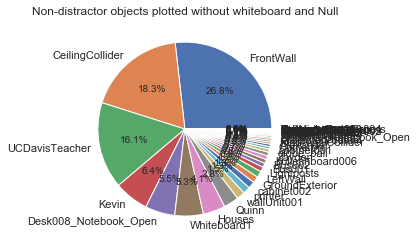

In [25]:
df_hold = df_object_type_duration[df_object_type_duration.Type == 'other']
df_hold = df_hold[df_hold.Name != 'Null']
df_hold = df_hold.sort_values(by='Duration',ascending=False)
dur = df_hold.Duration
lab = df_hold.Name
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.title('Non-distractor objects plotted without whiteboard and Null')
plt.show()

Table output organized by object type

In [26]:
df_object_type_duration.sort_values(by='Type').reset_index(drop=True)

,Name,Duration,Type
0,Child008,7.377502e+02,distractor
1,Child009,2.653759e+03,distractor
2,Child006,7.216191e+03,distractor
3,Child005,2.085681e+04,distractor
4,Child002,4.388061e+03,distractor
5,Child001,1.170886e+03,distractor
6,Pedestrian,2.632775e+02,distractor
7,cabinet001,1.548599e+03,other
8,Quinn,9.251466e+03,other
9,RightWallCollider,1.164527e+03,other


Table output ordered high-to-low by view duration

In [27]:
total_dt = df_object_type_duration.Duration.sum()
df_object_type_duration['Percentage'] = df_object_type_duration.Duration/total_dt
df_object_type_duration.sort_values(by='Percentage',ascending=False).reset_index(drop=True)

,Name,Duration,Type,Percentage
0,WhiteBoardWithDisplay,1.612207e+06,white board,0.739335
1,Null,2.012514e+05,other,0.092291
2,FrontWall,8.835492e+04,other,0.040518
3,CeilingCollider,6.039454e+04,other,0.027696
4,UCDavisTeacher,5.312409e+04,other,0.024362
5,Kevin,2.115358e+04,other,0.009701
6,Child005,2.085681e+04,distractor,0.009565
7,Desk008_Notebook_Open,1.820253e+04,other,0.008347
8,Whiteboard1,1.746041e+04,other,0.008007
9,Houses,1.367097e+04,other,0.006269
